In [1]:
'''
Importing packages 
import modules we're able to call functions
use of modules allows us to make our programs more robust and powerful 

'''


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
def preprocess_string(str_arg):
    '''
    input: str_arg --> Takes string to clean
    output: cleaned_str --> Gives back cleaned string
    This fuction cleans the text in the mentioned ways as comments after the line.This has been copied from some other kernel.

    '''
    cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
    cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
    
    return cleaned_str # Returning the preprocessed string in tokenized form


In [3]:
'''
#This code block is for reading and cleaning data.

'''
data_df = pd.read_csv(r'C:\Users\Umra Khan\Downloads\flipkart_com-ecommerce_sample.csv/flipkart_com-ecommerce_sample.csv')
# Reading relevant data
data_df['product_category_tree'] = data_df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())
# Category processing. (Check data to understand)
top_ten_gen = list(data_df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(10).index)
# Taking only top 10 categories for example sake
processed_df = data_df[data_df['product_category_tree'].isin(top_ten_gen)][['product_category_tree','description']]
# Selecting only relevant columns
processed_df['description'] = processed_df['description'].astype('str').apply(preprocess_string)
# Cleaning strings
cat_list = list(processed_df['product_category_tree'].unique())
# Creating a list of categories for later use
print(cat_list)
# Printing the list of top 10 categories
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(processed_df['product_category_tree'])
processed_df['product_category_tree'] = category_encoded
# Encoding the product category


['Clothing', 'Footwear', 'Beauty and Personal Care', 'Home Decor & Festive Needs', 'Automotive', 'Home Furnishing', 'Mobiles & Accessories', 'Jewellery', 'Kitchen & Dining', 'Computers']


In [4]:
data_df.info()
#it gives the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
uniq_id                    20000 non-null object
crawl_timestamp            20000 non-null object
product_url                20000 non-null object
product_name               20000 non-null object
product_category_tree      20000 non-null object
pid                        20000 non-null object
retail_price               19922 non-null float64
discounted_price           19922 non-null float64
image                      19997 non-null object
is_FK_Advantage_product    20000 non-null bool
description                19998 non-null object
product_rating             20000 non-null object
overall_rating             20000 non-null object
brand                      14136 non-null object
product_specifications     19986 non-null object
dtypes: bool(1), float64(2), object(12)
memory usage: 2.2+ MB


In [5]:
data_df.shape
#this gives the size of the dataframe

(20000, 15)

In [6]:
data_df.columns
#gives the columns which is presnt in the dataframe 


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
data_df.describe
#it is used to view statistical detailes such as mean,std, percentile

<bound method NDFrame.describe of                                 uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19995  7179d2f6c4ad50a17d014ca1d2815156  2015-12-01 10:15:43 +0000   
19996  71ac419198359d37b8fe5e3fffdfee09  2015-12-01 10:15:43 +0000   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1    

In [8]:
data_df.head(n=5)
#it gives top 5 rows

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


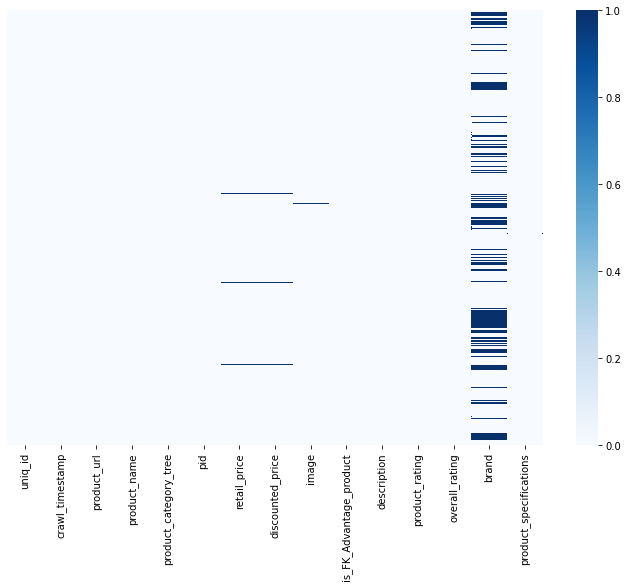

In [9]:
## The Brand column has lots of null values.

plt.figure(figsize =(12,8))
sns.heatmap(data_df.isnull(),yticklabels=False,cmap='Blues',cbar=True)


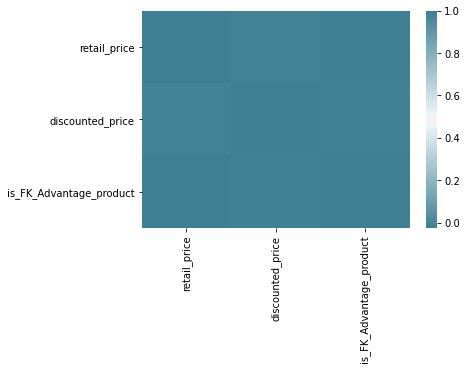

In [10]:
cmap=sns.diverging_palette(220,220,as_cmap=True)
ax=sns.heatmap(data_df.corr(),cmap=cmap)

In [11]:
data_df['main_category']=data_df['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])


In [12]:
'''
This code block is for spliting train test data

'''
X_train, X_test, y_train, y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.3)

In [13]:
'''
This code block is for converting the training data to vectorized form

'''
vect = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix = vect.fit_transform(X_train) 
# Converting the train data


In [14]:
'''
This code block is for training vectorized data and predicting & scoring test data

'''
clf=MultinomialNB()
# Defining model
clf.fit(X_train_matrix, y_train)
# Fitting to multinomial NB model 
print(clf.score(X_train_matrix, y_train))
# Scoring the trained model (Expected to be above 95 percent)
X_test_matrix = vect.transform(X_test) 
# Converting the test data
print (clf.score(X_test_matrix, y_test))
# Scoring for the test data
predicted_result=clf.predict(X_test_matrix)
print(classification_report(y_test,predicted_result))
# Printing score 


0.98007044068379
0.9709418837675351
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       305
           1       0.89      0.93      0.91       199
           2       1.00      0.99      0.99      1887
           3       0.93      0.80      0.86       177
           4       0.98      0.98      0.98       351
           5       0.96      0.99      0.97       273
           6       0.98      0.98      0.98       218
           7       0.94      1.00      0.97      1009
           8       0.99      0.88      0.93       197
           9       0.99      0.90      0.94       374

    accuracy                           0.97      4990
   macro avg       0.96      0.94      0.95      4990
weighted avg       0.97      0.97      0.97      4990



In [15]:
'''
This code block is for converting the training data to Tf-Idf form

'''
vectorizer = TfidfVectorizer(stop_words = 'english')
# Removing stop words
X_train_tfidf = vectorizer.fit_transform(X_train)
# Converting the train data


In [16]:
'''
The code block is for training, predicting & scoring test data

'''
clf2=MultinomialNB()
# Defining model
clf2.fit(X_train_tfidf, y_train)
# Fitting to multinomial NB model 
print(clf2.score(X_train_tfidf, y_train))
# Scoring the trained model (Expected to be above 95 percent)
X_test_tfidf = vectorizer.transform(X_test) 
# Converting the test data
print (clf2.score(X_test_tfidf, y_test))
# Printing score 


0.9595395584571772
0.9412825651302605


In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train_tfidf,y_train)
print(clf.score(X_train_tfidf,y_train))
X_test_tfidf = vectorizer.transform(X_test)
print(clf.score(X_test_tfidf,y_test))


0.9822180225066575
0.9825651302605211


In [19]:
'''
Testing Block: Test your sting. Replace the 'car' string to test
'''
le.inverse_transform(clf.predict(vect.transform(['saree','lipstick'])))


array(['Clothing', 'Beauty and Personal Care'], dtype=object)

In [20]:
data_df['main_category'].value_counts()[:10].sort_values(ascending=False)

othin                      6198
weller                     3531
otwea                      1227
biles & Accessorie         1099
tomotiv                    1012
me Decor & Festive Need     929
auty and Personal Car       710
me Furnishin                700
tchen & Dinin               647
mputer                      578
Name: main_category, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

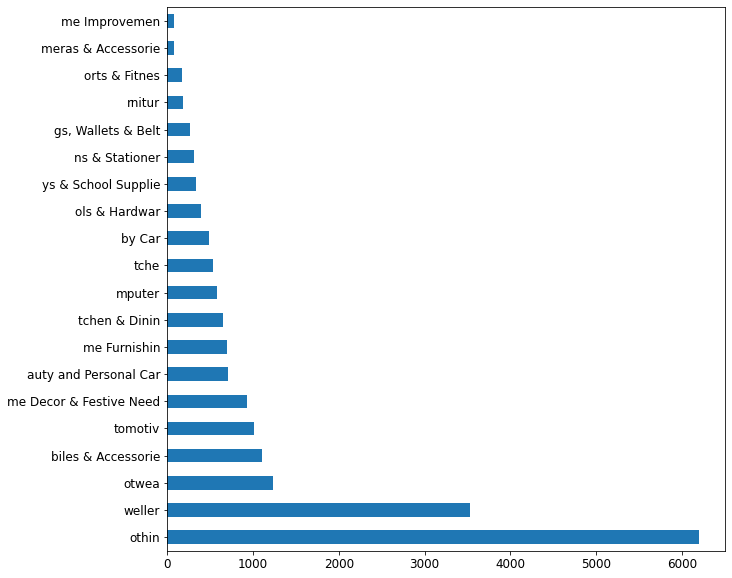

In [21]:
plt.figure(figsize=(10,10))
data_df['main_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)